## Contents
1. Importing libraries
2. Reading data, setting up
3. Visualizations
4. Exporting visualizations

### 1. Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy

### 2. Reading data, setting up

In [2]:
# Task 1.
# setting up filepath, reading data
path = r'C:\Users\Richárd\Desktop\CareerFoundry\Data Immersion\Archievment 4\Instacart_Basket_Analysis_2023_04_03\02_Data\Prepared_Data'
df_merged = pd.read_pickle(os.path.join(path, 'full_data.pkl'))
df_merged.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_after_previous_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_days_between_orders,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


### 3. Visualizations

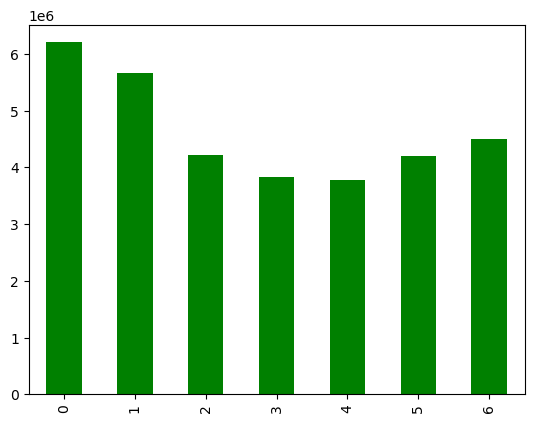

In [4]:
#Task 2.- crating charts
# Creating bar_chart
bar_chart = df_merged['orders_day_of_the_week'].value_counts().sort_index().plot.bar(color = 'green')

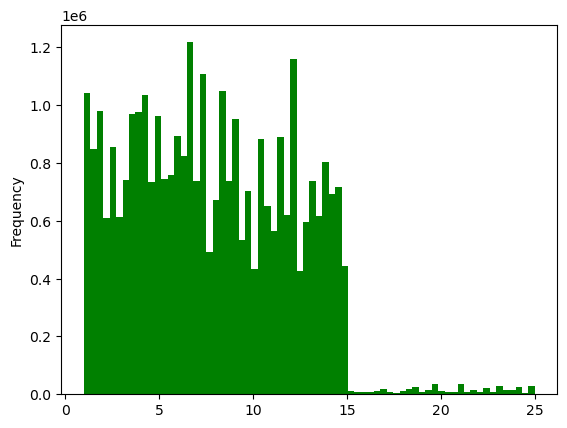

In [5]:
# Creating histogram
prices_histogram = df_merged['prices'].plot.hist(bins = 70, color = 'green')

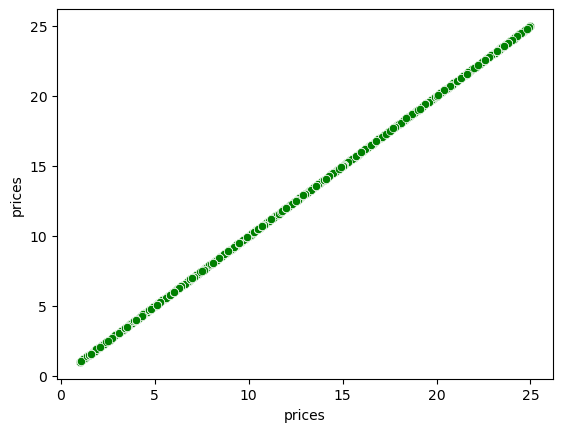

In [6]:
# Creating scatterplot
prices_scatterplot = sns.scatterplot(x = 'prices', y = 'prices', data = df_merged, color = 'green')


In [7]:
# Creating line chart
# Sampling
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [8]:
# storing 70% of data in a variable
big = df_merged[dev]

In [9]:
# storing 30% of data in a variable
small = df_merged[~dev]

In [10]:
# Checking if 
print(len(df_merged) == len(big) + len(small))

True


In [11]:
df = small[['orders_day_of_the_week','prices']]
df.head()

,orders_day_of_the_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5


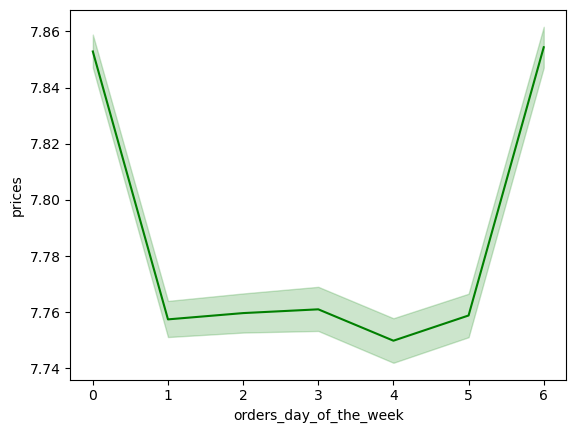

In [12]:
line = sns.lineplot(data = df, x = 'orders_day_of_the_week', y = 'prices', color = 'green')

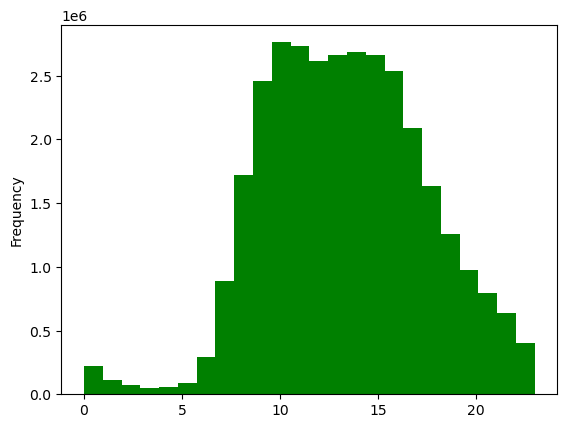

In [13]:
# Task 3. - histogram about orders hour of day
hours_histogram = df_merged['order_hour_of_day'].plot.hist(bins = 24, color = 'green')


#### Key Takeaways
1. Peak hours are between 09:00 and 17:00. The difference between these hours is quite small
2. Lowest hours are between 00:00 and 07:00, barely any orders happen during this time

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

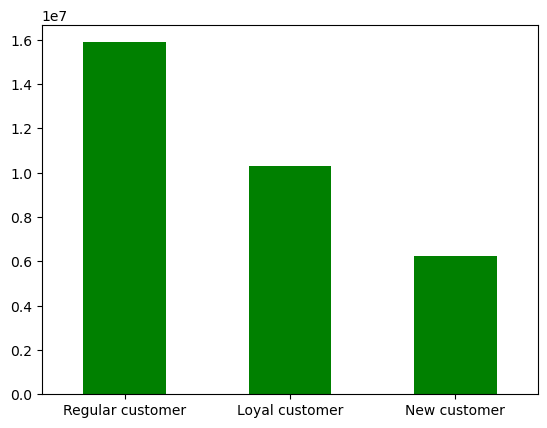

In [28]:
# Task 4. Bar chart about loyality distribution
loyality_bar = df_merged['loyality_flag'].value_counts().plot.bar(color = 'green')
plt.xticks(rotation = 0)


In [15]:
# Task 5. Line chart about hours/spendings
df2 = small[['order_hour_of_day', 'prices']]

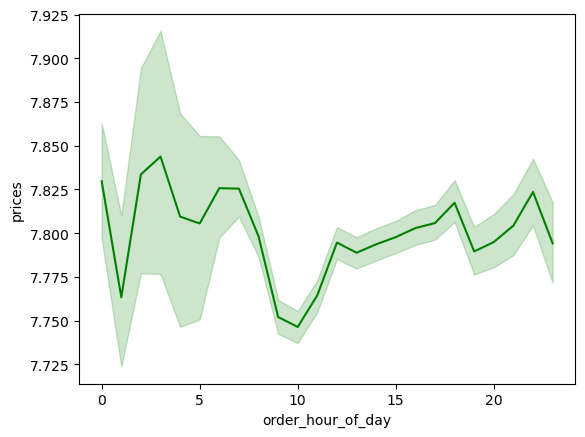

In [16]:
hourly_spending_line = sns.lineplot(data = df2, x = 'order_hour_of_day', y = 'prices', color = 'green')

In [17]:
# Task 6. Relation between age and family situation
df3 = small[['age', 'number_of_dependants']]
df3.dtypes

age                     int64
number_of_dependants    int64
dtype: object

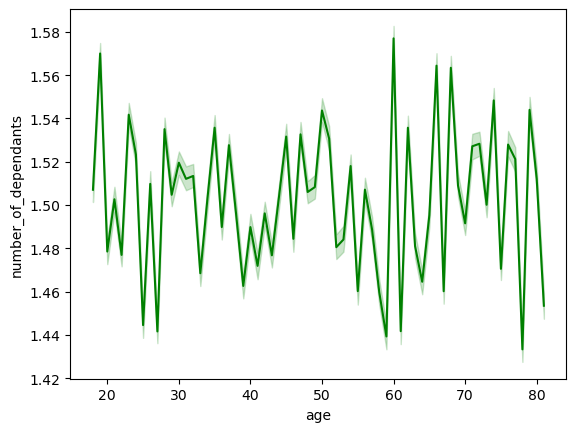

In [18]:
age_family_line = sns.lineplot(data = df3, x = 'age', y = 'number_of_dependants', color = 'green')

### Key takeaways
1. There seems to be no correlation between the two varables
2. The average number of dependants (aka. children in most cases) is above 1 in every age group
3. Family status and age appears to have no connection

In [19]:
# Task 7. Relationship between age and spending power (aka. income)
df4 = small[['age', 'income']]
df4.head()

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


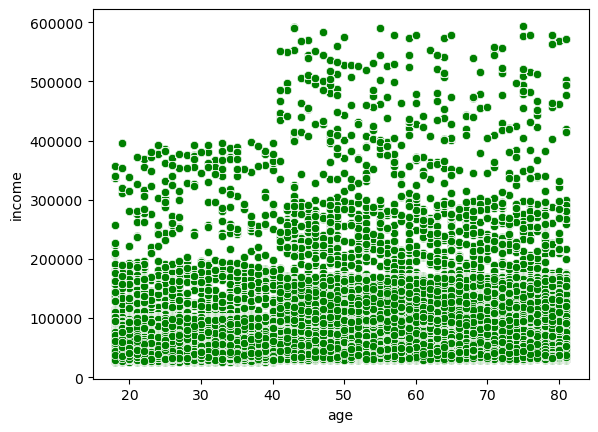

In [20]:
age_income_scatter = sns.scatterplot(data = df4, x = 'age', y = 'income', color = 'green')

### Key Takeaways
1. The people with the highest spending power tend to be above 40 years old
2. However there is no clear correlation between age and spending power
3. Customers under 40 years old almost never earn above 400.000 / year

### 4. Exporting visualizations

In [21]:
# Task 8. Exporting visualizations
viz_path = r'C:\Users\Richárd\Desktop\CareerFoundry\Data Immersion\Archievment 4\Instacart_Basket_Analysis_2023_04_03\04_Analysis\Visualizations'
hours_histogram.figure.savefig(os.path.join(viz_path, 'order_hours_histogram.png'))

In [29]:
loyality_bar.figure.savefig(os.path.join(viz_path, 'loyality_distribution_barchart.png'))

In [23]:
hourly_spending_line.figure.savefig(os.path.join(viz_path, 'hourly_spending_linechart.png'))

In [24]:
age_family_line.figure.savefig(os.path.join(viz_path, 'age_familystatus_relationship_linechart.png'))

In [25]:
age_income_scatter.figure.savefig(os.path.join(viz_path, 'age_income_relationship_scatterplot.png'))

In [27]:
bar_chart.figure.savefig(os.path.join(viz_path, 'order_days_distribution.png'))

<Axes: >

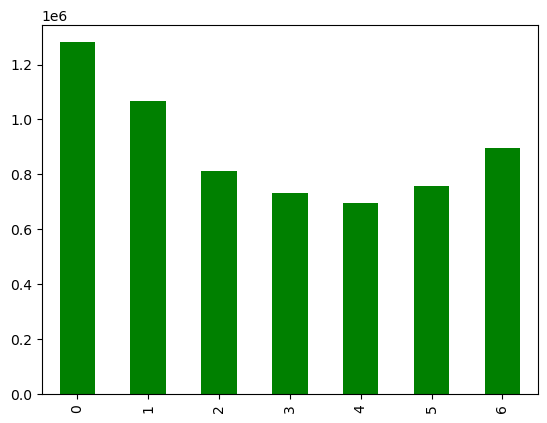